In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_excel('geo.xlsx')

In [4]:
data.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108806 entries, 0 to 108805
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     108806 non-null  int64  
 1   x              108806 non-null  float64
 2   y              108806 non-null  float64
 3   comment_class  108806 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 MB


#### Визуально разделить город на районы безотносительно голосов

Text(0.5, 1.0, 'Districts')

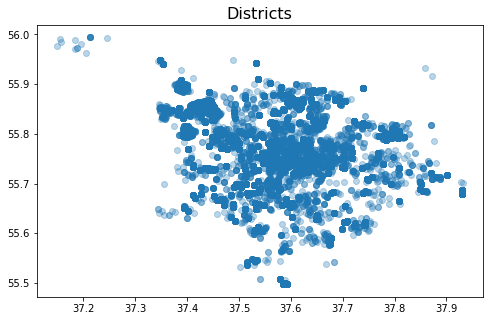

In [8]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.scatter(x=data.x, y=data.y, alpha=0.3)

plt.title(label="Districts", fontsize=16) 

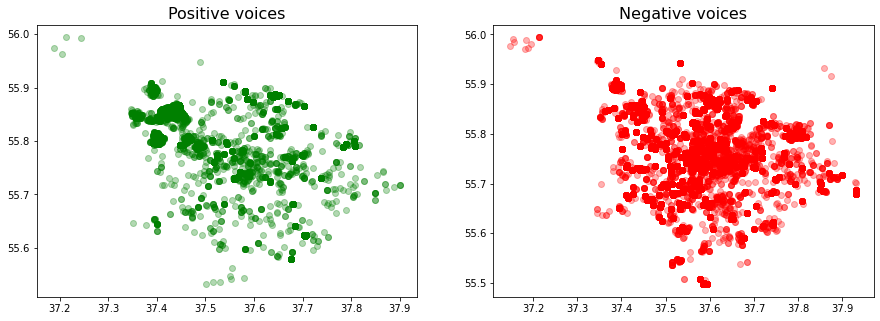

In [9]:
#отобразим голоса на карте
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5)) 

ax1.scatter(x=data.x[data.comment_class==1], y=data.y[data.comment_class==1], alpha=0.3, color='g')
ax2.scatter(x=data.x[data.comment_class==-1], y=data.y[data.comment_class==-1], alpha=0.3, color='r')

titles = ["Positive voices", "Negative voices"]
for number, title in zip (fig.axes, titles):
    number.set_title(title, fontsize=16)

#### Провести кластеризацию

In [10]:
from sklearn.cluster import KMeans, DBSCAN

In [11]:
data_changed=data.drop("comment_class", axis=1)

In [12]:
#в случае с KMeans нужно явно указать кол-во кластеров
#для примера возьмем 7 кластеров
km = KMeans(n_clusters=7)
km.fit(data_changed)
clusters = km.predict(data_changed)

In [13]:
for i in range(7):
    print (i,'cluster =',len(data_changed[clusters==i]))

0 cluster = 15625
1 cluster = 15503
2 cluster = 15581
3 cluster = 15669
4 cluster = 15780
5 cluster = 15362
6 cluster = 15286


Text(0.5, 1.0, 'Clustering of districts')

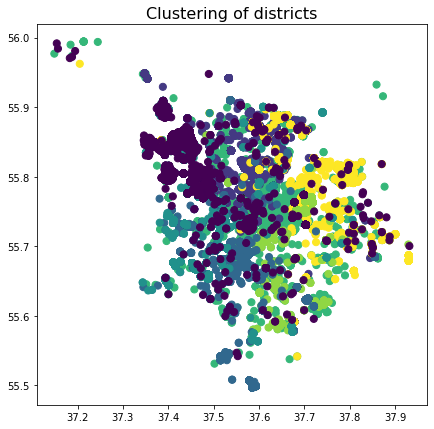

In [16]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
plt.scatter(data_changed.x, data_changed.y, c=clusters, s=50)
plt.title(label="Clustering of districts", fontsize=16) 

In [15]:
db = DBSCAN(eps=0.02, min_samples=500, n_jobs=-1)
db_clusters = db.fit_predict(data_changed)

Text(0.5, 1.0, 'Clustering of districts')

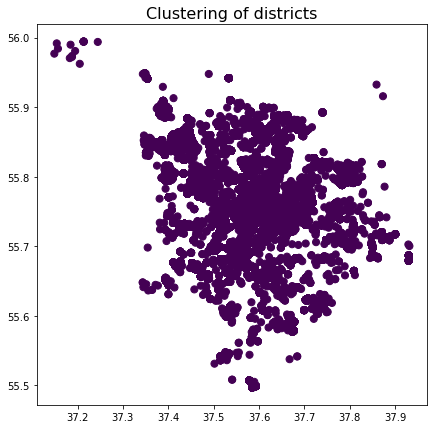

In [17]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
plt.scatter(data_changed.x, data_changed.y, c=db_clusters, s=50)
plt.title(label="Clustering of districts", fontsize=16) 

#### Аналогично исследовать скопления голосов за и против отдельно

In [18]:
km = KMeans(n_clusters=7)
km.fit(data_changed[data.comment_class==1])
clusters = km.predict(data_changed[data.comment_class==1])

In [19]:
db = DBSCAN()
db_clusters = db.fit_predict(data_changed[data.comment_class==1])

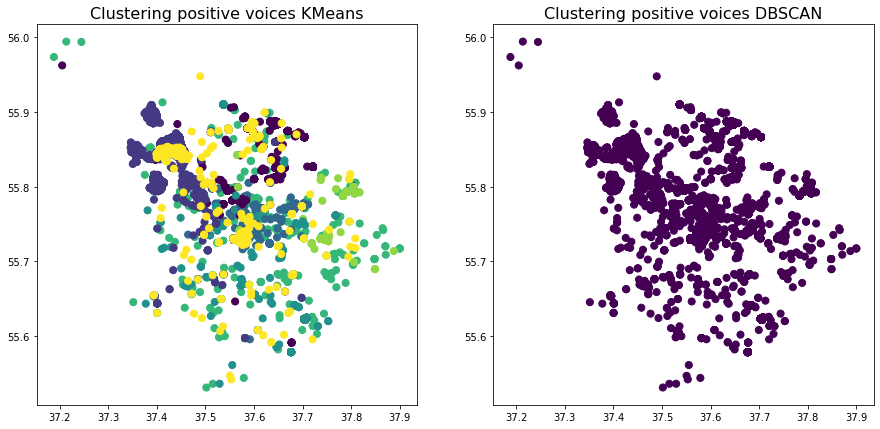

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,7))
ax1.scatter(data_changed.x[data.comment_class==1], data_changed.y[data.comment_class==1], c=clusters, s=50)
ax2.scatter(data_changed.x[data.comment_class==1], data_changed.y[data.comment_class==1], c=db_clusters, s=50)

titles = ["Clustering positive voices KMeans","Clustering positive voices DBSCAN"]

for number, title in zip(fig.axes, titles):
    number.set_title(title, fontsize=16)

In [21]:
km = KMeans(n_clusters=7)
km.fit(data_changed[data.comment_class==-1])
clusters = km.predict(data_changed[data.comment_class==-1])

In [22]:
db = DBSCAN()
db_clusters = db.fit_predict(data_changed[data.comment_class==-1])

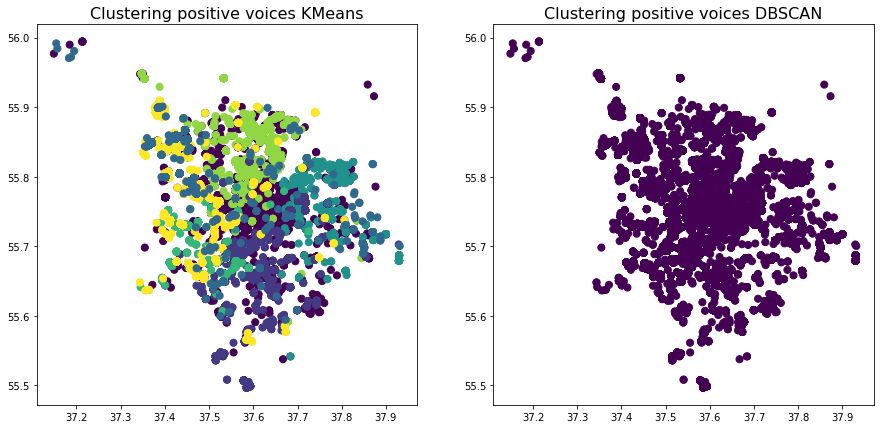

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,7))
ax1.scatter(data_changed.x[data.comment_class==-1], data_changed.y[data.comment_class==-1], c=clusters, s=50)
ax2.scatter(data_changed.x[data.comment_class==-1], data_changed.y[data.comment_class==-1], c=db_clusters, s=50)

titles = ["Clustering positive voices KMeans","Clustering positive voices DBSCAN"]

for number, title in zip(fig.axes, titles):
    number.set_title(title, fontsize=16)

#### Подобрать оптимальное число кластеров 

In [83]:
# Посчитаем значения inertia при разном количестве кластеров. 
# Они объективно стремятся к нулю с ростом числа кластеров 

In [24]:
c_inertia = []
clusters = range(1,11)

for cl in clusters:
    clf_kmeans = KMeans(n_clusters=cl)
    clusters_kmeans = clf_kmeans.fit_predict(data_changed)
    c_inertia.append(clf_kmeans.inertia_)

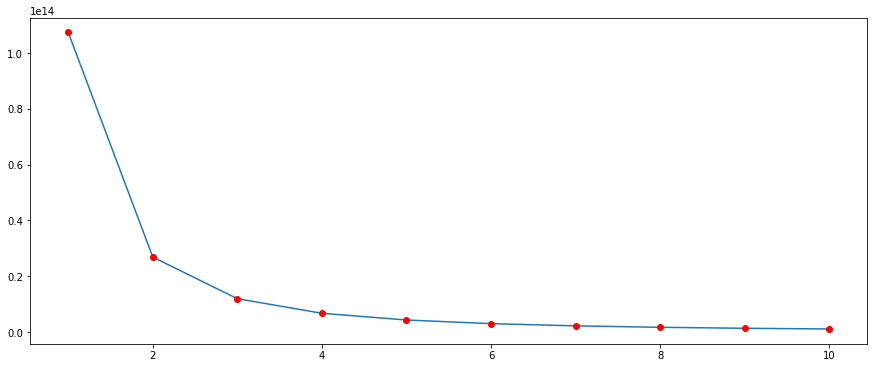

In [29]:
fig = plt.figure(figsize=(15,6))
plt.plot(clusters, c_inertia)
plt.plot(clusters, c_inertia ,'ro')

In [86]:
#Для начала считаем сами изменения

$${inertia_{k+1}-inertia_{k}}$$

In [26]:
diff = np.diff(c_inertia) #np.diff - вычислить N-ю дискретную разность по заданной оси

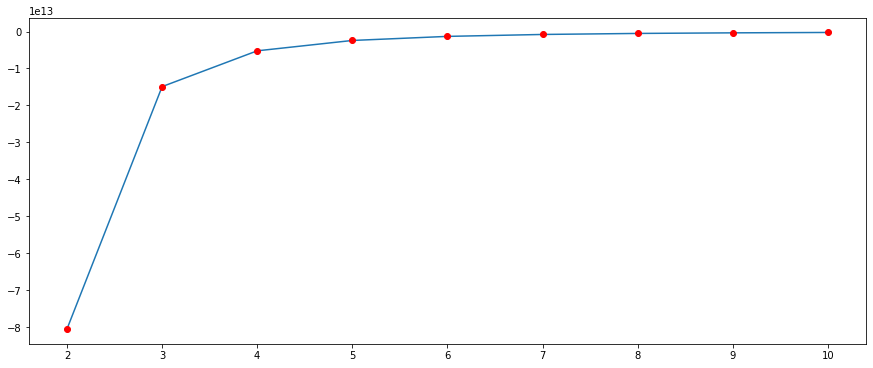

In [27]:
fig = plt.figure(figsize=(15,6))
plt.plot(clusters[1:], diff)
plt.plot(clusters[1:], diff ,'ro')

In [ ]:
#Исходя из графика, количество кластеров можно было бы оставить 3
#Теперь можно найти оптимальное число кластеров по этой формуле:

$$k_{opt} = argmin(\frac{inertia_{k+1}-inertia_{k}}{inertia_{k}-inertia_{k-1}})$$

In [28]:
diff_r = diff[1:] / diff[:-1]

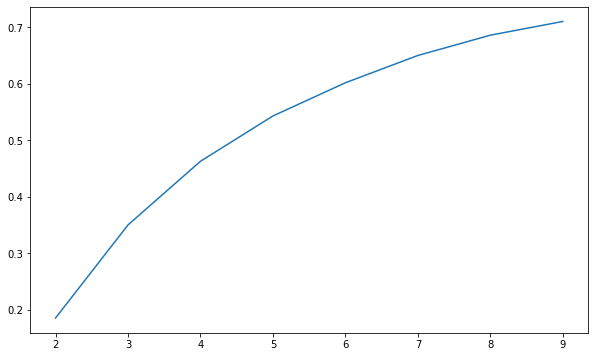

In [30]:
fig = plt.figure(figsize=(10,6))
plt.plot(clusters[1:-1], diff_r)

In [31]:
k_opt = clusters[np.argmin(diff_r)+1]
k_opt

2

In [92]:
#Это достаточно субъективная оценка

#### Найти наиболее активные в голосовании районы

In [32]:
db = DBSCAN()
db_clusters = db.fit_predict(data_changed)

Text(0.5, 1.0, 'Most active districts in voting')

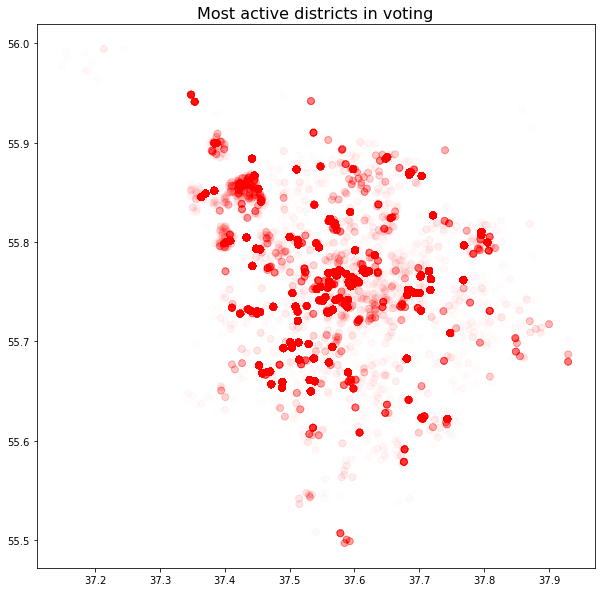

In [41]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(data_changed.x, data_changed.y, c=db_clusters, cmap='autumn', s=50, alpha=0.01)
plt.title(label="Most active districts in voting", fontsize=16) 